In [1]:
import sys
import pandas as pd
scripts_dir = r'E:\DS+ML\AIM3\Week-8-9\DataFraud_Detection_E_Commerce_Bank_Transaction\scripts'
src_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\src'
# Load the datasets
fraud_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data.csv")
creditcard_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\creditcard.csv")
ip_to_country = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\IpAddress_to_Country.csv")
output_path = r"E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data_Merged.csv"
output_future_engineered = r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv"
# Add directories to the Python path if they are not already included
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)

#### Display first few rows for each dataset

In [2]:
print("Fraud Data Head:")
fraud_data.head()

Fraud Data Head:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
print("\nCredit Card Data Head:")
creditcard_data.head()


Credit Card Data Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("\nIP to Country Data Head:")
ip_to_country.head()


IP to Country Data Head:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#### Display basic statistics for numerical columns

In [5]:
print("\nFraud Data Describe:")
print(fraud_data.describe())

print("\nCredit Card Data Describe:")
print(creditcard_data.describe())


Fraud Data Describe:
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

Credit Card Data Describe:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848

#### Check dataset shape (rows, columns)

In [6]:
print("\nFraud Data Shape:", fraud_data.shape)
print("Credit Card Data Shape:", creditcard_data.shape)
print("IP to Country Data Shape:", ip_to_country.shape)


Fraud Data Shape: (151112, 11)
Credit Card Data Shape: (284807, 31)
IP to Country Data Shape: (138846, 3)


#### Dataset Info (Data types and non-null counts)

In [7]:
print("\nFraud Data Info:")
print(fraud_data.info())

print("\nCredit Card Data Info:")
print(creditcard_data.info())

print("\nIP to Country Data Info:")
print(ip_to_country.info())


Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   --

#### Class distribution for target variables

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Group by target variable 'class' in Fraud_Data
fraud_class_counts = fraud_data['class'].value_counts()
fraud_class_percentage = fraud_data['class'].value_counts(normalize=True) * 100

# Group by target variable 'Class' in creditcard dataset
creditcard_class_counts = creditcard_data['Class'].value_counts()
creditcard_class_percentage = creditcard_data['Class'].value_counts(normalize=True) * 100

# Displaying counts and percentages for both datasets
print("\nFraud_Data Class Distribution Count:")
print(fraud_class_counts)
print("\nFraud_Data Class Distribution Percentage:")
print(fraud_class_percentage)

print("\nCreditCard Class Distribution Count:")
print(creditcard_class_counts)
print("\nCreditCard Class Distribution Percentage:")
print(creditcard_class_percentage)

# Create 3D Pie Charts using Plotly
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]], 
                    subplot_titles=("Fraud_Data Target Class Distribution", "CreditCard Target Class Distribution"))

# Fraud Data 3D Pie Chart
fig.add_trace(go.Pie(
    labels=['Non-Fraudulent (0)', 'Fraudulent (1)'],
    values=fraud_class_counts,
    hole=0.4,
    pull=[0, 0.1],  # Pull out the "Fraudulent" slice
    marker=dict(colors=['#66b3ff', '#ff6666']),
    textinfo='percent+label',
    hoverinfo='label+percent',
    name="Fraud_Data"
), 1, 1)

# Credit Card 3D Pie Chart
fig.add_trace(go.Pie(
    labels=['Non-Fraudulent (0)', 'Fraudulent (1)'],
    values=creditcard_class_counts,
    hole=0.4,
    pull=[0, 0.1],  # Pull out the "Fraudulent" slice
    marker=dict(colors=['#66b3ff', '#ff6666']),
    textinfo='percent+label',
    hoverinfo='label+percent',
    name="CreditCard"
), 1, 2)

# Update layout for 3D effect and annotations
fig.update_layout(
    title_text="Target Class Distribution in Fraud_Data and CreditCard Datasets",
    title_font_size=20,
    title_x=0.5,
    annotations=[dict(text='Fraud_Data', x=0.18, y=0.5, font_size=14, showarrow=False),
                 dict(text='CreditCard', x=0.82, y=0.5, font_size=14, showarrow=False)],
    showlegend=False
)

# Add 3D effect
fig.update_traces(hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  textfont=dict(size=14, family="Arial"))

# Show the interactive 3D pie charts
fig.show()


Fraud_Data Class Distribution Count:
class
0    136961
1     14151
Name: count, dtype: int64

Fraud_Data Class Distribution Percentage:
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

CreditCard Class Distribution Count:
Class
0    284315
1       492
Name: count, dtype: int64

CreditCard Class Distribution Percentage:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


#### Check for missing values in each dataset

In [9]:
fraud_data_missing = fraud_data.isnull().sum()
creditcard_data_missing = creditcard_data.isnull().sum()
ip_to_country_missing = ip_to_country.isnull().sum()

fraud_data_missing, creditcard_data_missing, ip_to_country_missing

(user_id           0
 signup_time       0
 purchase_time     0
 purchase_value    0
 device_id         0
 source            0
 browser           0
 sex               0
 age               0
 ip_address        0
 class             0
 dtype: int64,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
 lower_bound_ip_address    0
 upper_bound_ip_address    0
 country                   0
 dtype: int64)

##### Comment: No missing values

#### Check for duplicates

In [10]:
print("\nChecking for duplicates in Fraud Data:")
print(fraud_data.duplicated().sum())  # Number of duplicate rows

print("\nChecking for duplicates in Credit Card Data:")
print(creditcard_data.duplicated().sum())

print("\nChecking for duplicates in IP to Country Data:")
print(ip_to_country.duplicated().sum())



Checking for duplicates in Fraud Data:
0

Checking for duplicates in Credit Card Data:
1081

Checking for duplicates in IP to Country Data:
0


We have found duplicates in credit card data
so lets remove it 

In [11]:
creditcard_data= creditcard_data.drop_duplicates()
print(creditcard_data.duplicated().sum()) # Duplicates removed 

0


#### Univariant

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


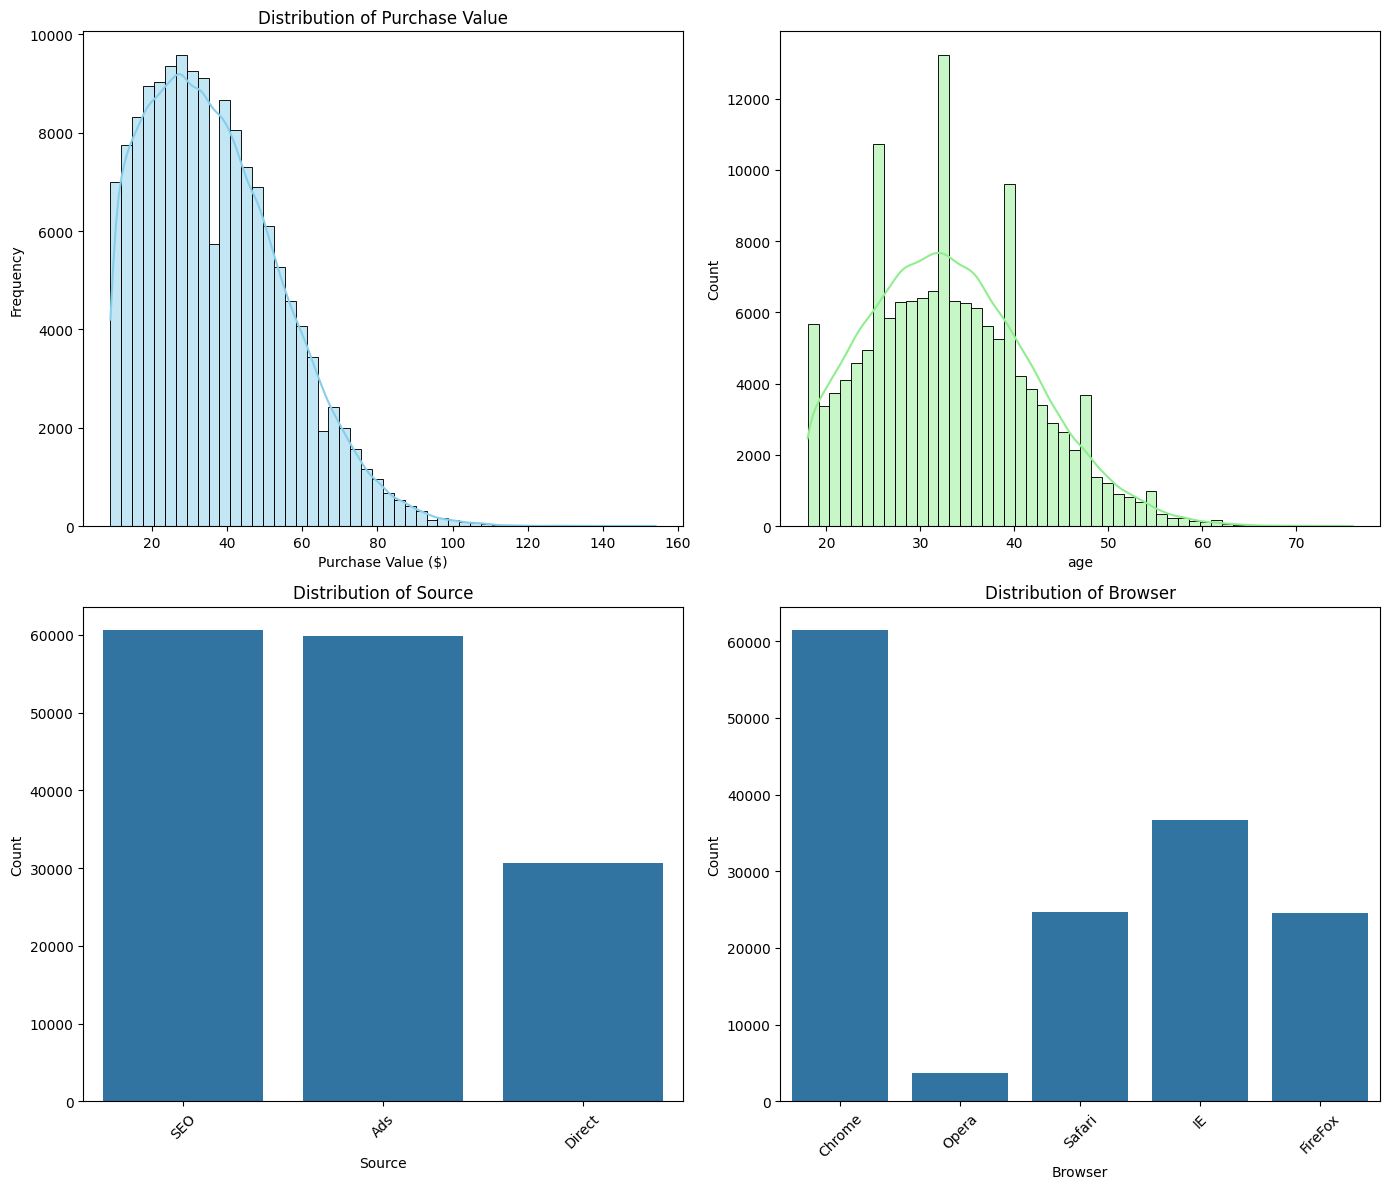

In [13]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 'purchase_value' - Histogram
sns.histplot(fraud_data['purchase_value'], bins=50, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Purchase Value')
axes[0, 0].set_xlabel('Purchase Value ($)')
axes[0, 0].set_ylabel('Frequency')

# Plot 'age' - Histogram
sns.histplot(fraud_data['age'], bins=50, kde=True, color='lightgreen', ax=axes[0, 1])
axes[1, 1].set_title('Distribution of Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')

# Plot 'source' - Bar Chart
sns.countplot(x='source', data=fraud_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Source')
axes[1, 0].set_xlabel('Source')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 'browser' - Bar Chart
sns.countplot(x='browser', data=fraud_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Browser')
axes[1, 1].set_xlabel('Browser')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


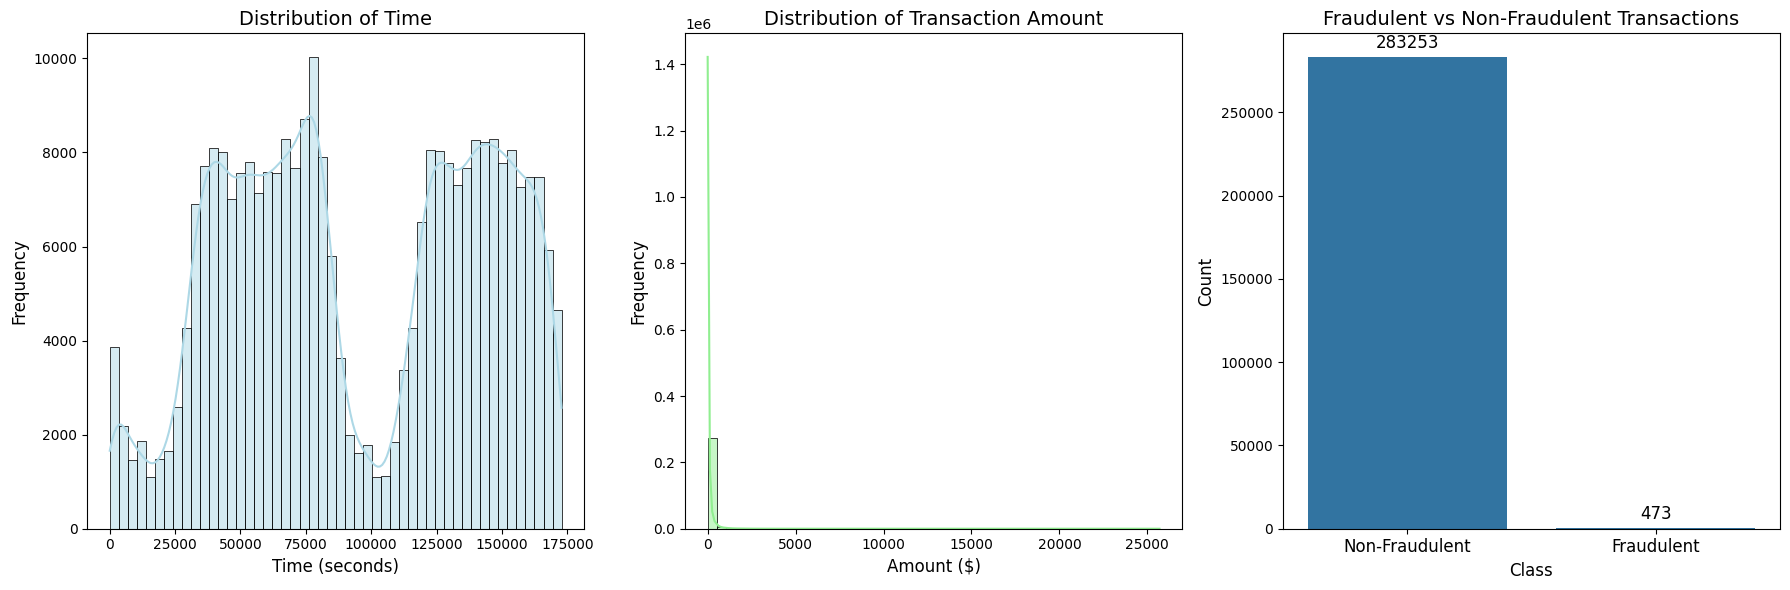

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 'Time' - Histogram
sns.histplot(creditcard_data['Time'], bins=50, kde=True, color='lightblue', ax=axes[0])
axes[0].set_title('Distribution of Time', fontsize=14)
axes[0].set_xlabel('Time (seconds)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Plot 'Amount' - Histogram
sns.histplot(creditcard_data['Amount'], bins=50, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount', fontsize=14)
axes[1].set_xlabel('Amount ($)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Plot 'Class' - Bar Chart (Fraudulent vs Non-Fraudulent)
sns.countplot(x='Class', data=creditcard_data, ax=axes[2])
axes[2].set_title('Fraudulent vs Non-Fraudulent Transactions', fontsize=14)
axes[2].set_xlabel('Class', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

# Fix the x-tick labels for the 'Class' bar chart
axes[2].set_xticks([0, 1])  # Explicitly set tick positions
axes[2].set_xticklabels(['Non-Fraudulent', 'Fraudulent'], fontsize=12)  # Now safe to use

# Add annotations to the bar chart
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points',
                     fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

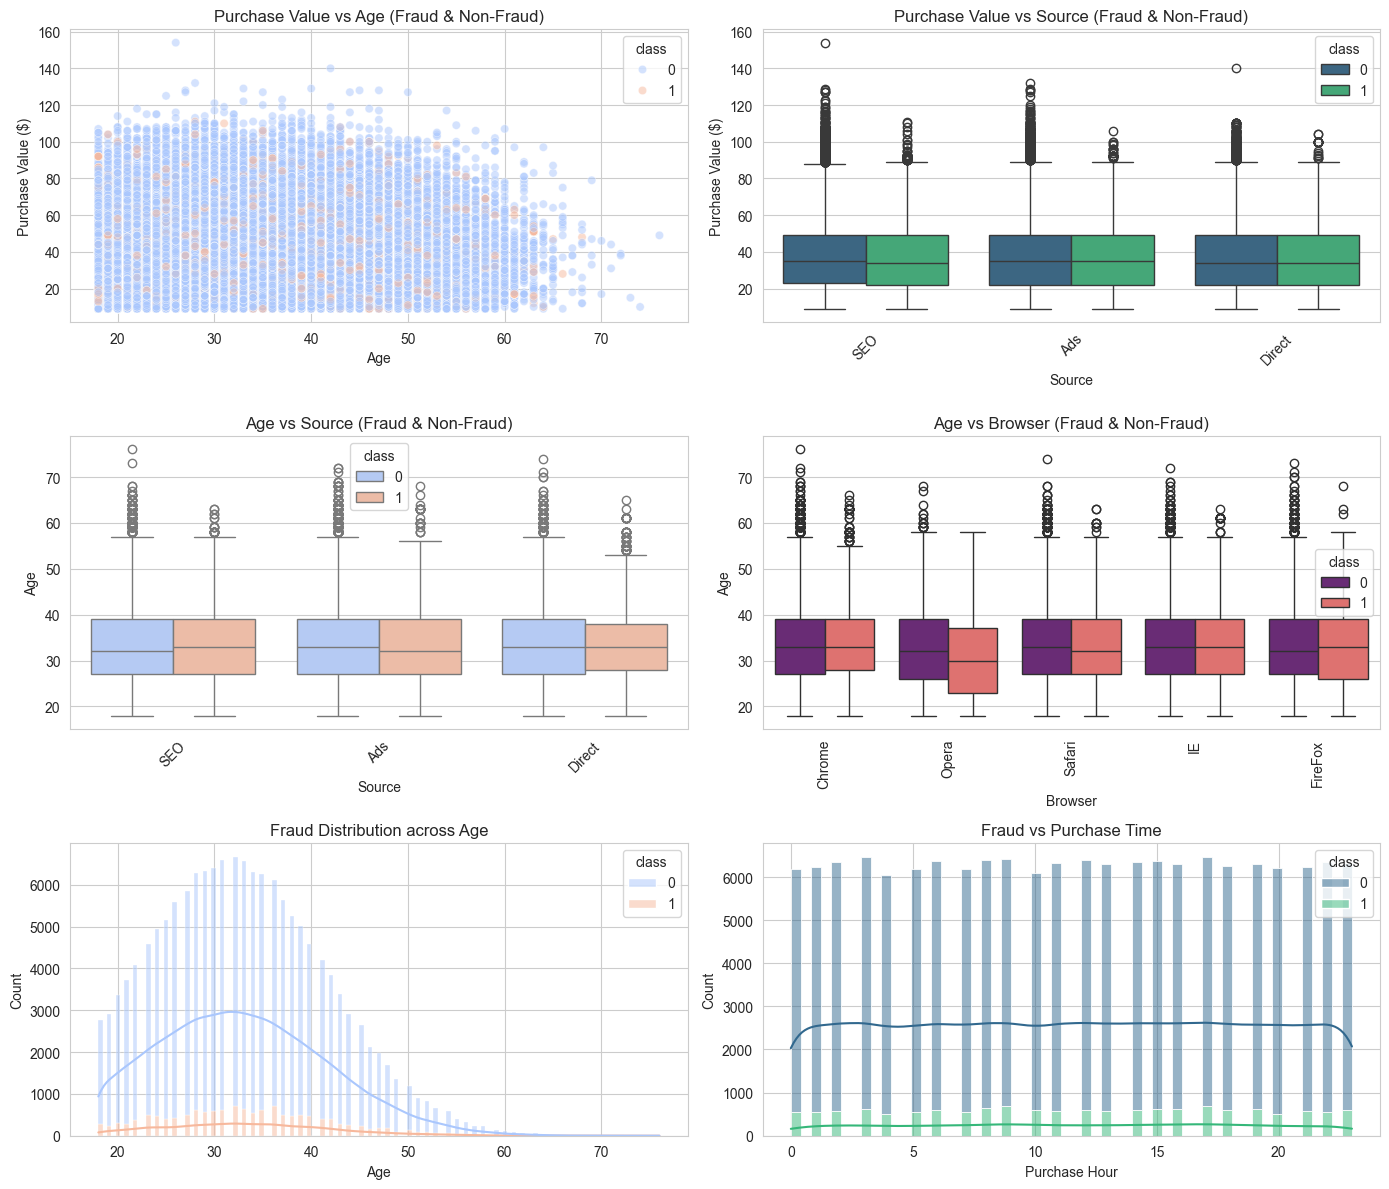

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Set up figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# 1. Purchase Value vs Age (Fraud & Non-Fraud)
sns.scatterplot(x='age', y='purchase_value', hue='class', data=fraud_data, alpha=0.5, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Purchase Value vs Age (Fraud & Non-Fraud)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Purchase Value ($)')

# 2. Purchase Value vs Source (Fraud & Non-Fraud)
sns.boxplot(x='source', y='purchase_value', hue='class', data=fraud_data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Purchase Value vs Source (Fraud & Non-Fraud)')
axes[0, 1].set_xlabel('Source')
axes[0, 1].set_ylabel('Purchase Value ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Age vs Source (Fraud & Non-Fraud)
sns.boxplot(x='source', y='age', hue='class', data=fraud_data, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Age vs Source (Fraud & Non-Fraud)')
axes[1, 0].set_xlabel('Source')
axes[1, 0].set_ylabel('Age')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Age vs Browser (Fraud & Non-Fraud)
sns.boxplot(x='browser', y='age', hue='class', data=fraud_data, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Browser (Fraud & Non-Fraud)')
axes[1, 1].set_xlabel('Browser')
axes[1, 1].set_ylabel('Age')
axes[1, 1].tick_params(axis='x', rotation=90)

# 5. Fraud Distribution across Age
sns.histplot(fraud_data, x="age", hue="class", multiple="stack", palette="coolwarm", kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Fraud Distribution across Age')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Count')

# 6. Purchase Time vs Class (Fraud & Non-Fraud)
fraud_data['purchase_hour'] = pd.to_datetime(fraud_data['purchase_time']).dt.hour
sns.histplot(fraud_data, x="purchase_hour", hue="class", multiple="stack", palette="viridis", kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Fraud vs Purchase Time')
axes[2, 1].set_xlabel('Purchase Hour')
axes[2, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


#### Correlation 

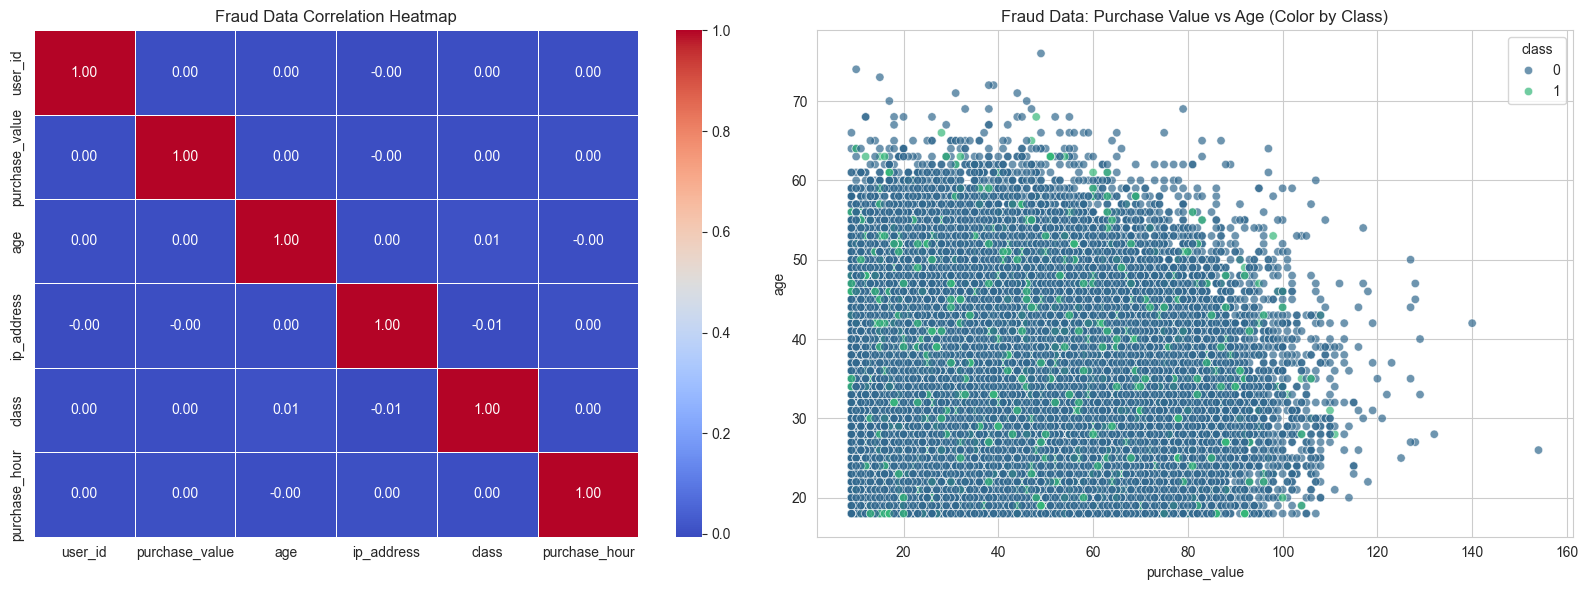

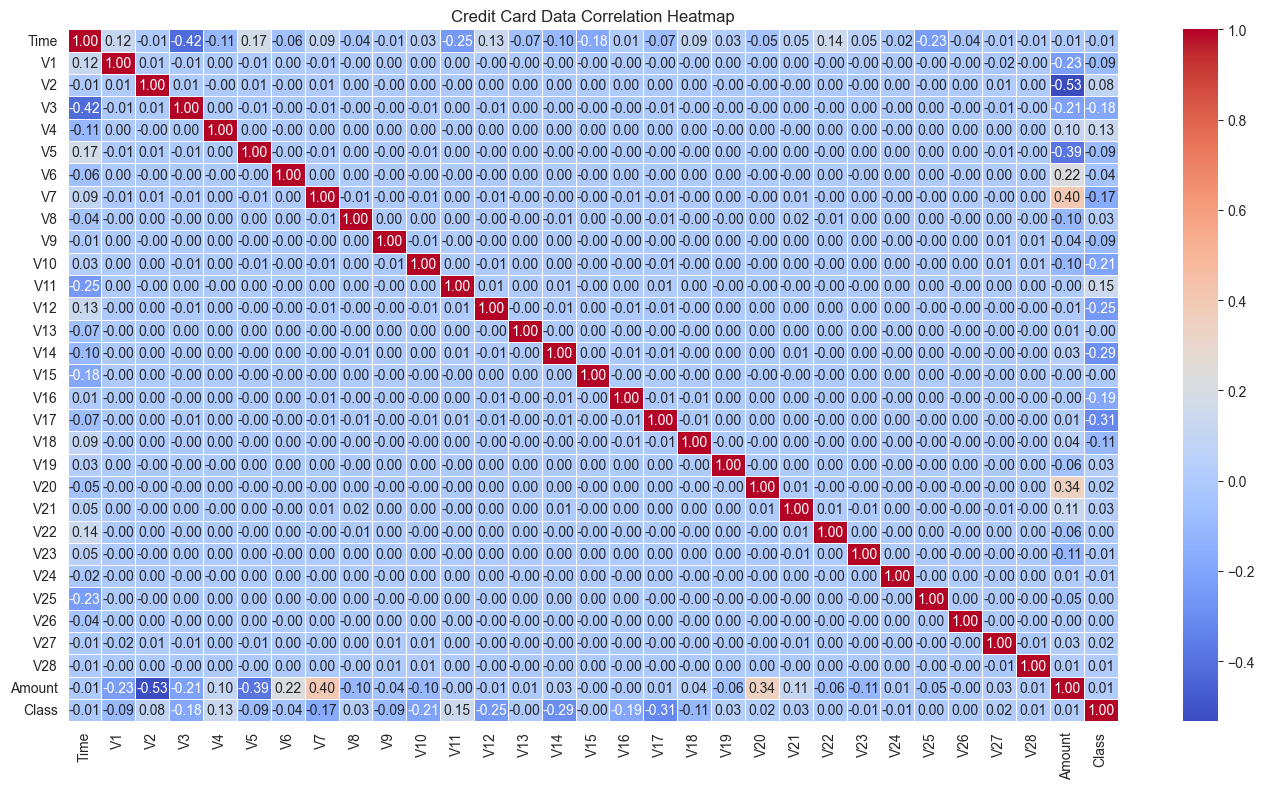

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns for correlation
numeric_fraud_data = fraud_data.select_dtypes(include=['number'])
numeric_credit_data = creditcard_data.select_dtypes(include=['number'])

# ----- First Figure: Fraud Data (1 row, 2 columns) -----
fig1, axs1 = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Heatmap for Fraud Data
corr_fraud = numeric_fraud_data.corr()
sns.heatmap(corr_fraud, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axs1[0])
axs1[0].set_title("Fraud Data Correlation Heatmap")

# Scatter Plot for Fraud Data (Colorful)
sns.scatterplot(x=numeric_fraud_data['purchase_value'], y=numeric_fraud_data['age'], hue=numeric_fraud_data['class'], palette="viridis", alpha=0.7, ax=axs1[1])
axs1[1].set_title("Fraud Data: Purchase Value vs Age (Color by Class)")

plt.tight_layout()
plt.show()

# ----- Second Figure: Credit Card Data (Only Heatmap) -----
fig2, ax2 = plt.subplots(figsize=(14, 8))  # Single heatmap

# Heatmap for Credit Card Data
corr_credit = numeric_credit_data.corr()
sns.heatmap(corr_credit, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax2)
ax2.set_title("Credit Card Data Correlation Heatmap")

plt.tight_layout()
plt.show()


#### Merging Dataset

In [17]:
# Convert fraud_data IP address to integer format
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
# Create a function to check if IP address falls within the range
def find_country_by_ip(ip):
    # Find the row where IP falls within the range
    matched_row = ip_to_country[(ip >= ip_to_country['lower_bound_ip_address']) & 
                                
                                
                                  (ip <= ip_to_country['upper_bound_ip_address'])]
    if not matched_row.empty:
        return matched_row['country'].values[0]
    else:
        return 'Unknown'  # Handle cases where no match is found

# Apply the function to fraud_data
fraud_data['country'] = fraud_data['ip_address'].apply(find_country_by_ip)



In [18]:
# Save the updated data
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_hour,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,2,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,18,Unknown
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,13,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,18,United States


In [19]:
fraud_data.to_csv(output_path, index=False)  
print(f"Data successfully saved to {output_path}")

Data successfully saved to E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data_Merged.csv


#### Feature Engineering 

##### Transaction Frequency and Velocity

In [20]:
# Calculate transaction frequency per user
transaction_frequency = fraud_data.groupby('user_id').size().reset_index(name='transaction_frequency')

# Merge the frequency back into the fraud_data
fraud_data = fraud_data.merge(transaction_frequency, on='user_id', how='left')
# Convert purchase_time to datetime
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Calculate the first and last transaction times for each user
user_transaction_times = fraud_data.groupby('user_id')['purchase_time'].agg(['min', 'max'])

# Calculate the transaction velocity (time between first and last transaction divided by frequency)
user_transaction_times['transaction_velocity'] = (user_transaction_times['max'] - user_transaction_times['min']).dt.total_seconds() / fraud_data.groupby('user_id').size()

# Merge the transaction velocity into fraud_data
fraud_data = fraud_data.merge(user_transaction_times[['transaction_velocity']], on='user_id', how='left')


##### Time based feature 

In [21]:
# Extract hour of day
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
# Extract day of week (0=Monday, 6=Sunday)
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek


In [22]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_hour,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,2,Japan,1,0.0,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States,1,0.0,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,18,Unknown,1,0.0,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,13,Unknown,1,0.0,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,18,United States,1,0.0,18,2


#### Normalization 

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize 'purchase_value', 'transaction_frequency', and 'transaction_velocity'
scaler = MinMaxScaler()
# Convert boolean columns to 1/0

fraud_data[['purchase_value', 'transaction_frequency', 'transaction_velocity']] = scaler.fit_transform(
    fraud_data[['purchase_value', 'transaction_frequency', 'transaction_velocity']])


In [24]:
# Standardize the 'age' column
scaler = StandardScaler()
fraud_data['age'] = scaler.fit_transform(fraud_data[['age']])


In [25]:
print(fraud_data.columns)


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'purchase_hour', 'country', 'transaction_frequency',
       'transaction_velocity', 'hour_of_day', 'day_of_week'],
      dtype='object')


#### Encode Categorical Features

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Convert datetime columns to timestamps (nanoseconds since the Unix epoch)
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time']).astype('int64') // 10**9  # Convert to seconds
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time']).astype('int64') // 10**9  # Convert to seconds

# Perform one-hot encoding for categorical columns
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'country'], drop_first=True)

# Label encode 'sex' column
label_encoder = LabelEncoder()
fraud_data['sex'] = label_encoder.fit_transform(fraud_data['sex'])

# Convert only boolean columns (True/False) to 1/0
# Identify boolean columns (if any)
boolean_columns = fraud_data.select_dtypes(include=['bool']).columns
fraud_data[boolean_columns] = fraud_data[boolean_columns].astype(int)
fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,purchase_hour,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uzbekistan,country_Viet Nam,country_Virgin Islands (U.S.),country_Zambia
0,22058,1424818549,1429325231,0.172414,QVPSPJUOCKZAR,1,0.679914,732758368,0,2,...,0,0,0,0,0,0,0,0,0,0
1,333320,1433709590,1433727534,0.048276,EOGFQPIZPYXFZ,0,2.304476,350311387,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1359,1420138364,1420138365,0.041379,YSSKYOSJHPPLJ,1,2.304476,-2147483648,1,18,...,0,0,0,0,0,1,0,0,0,0
3,150084,1430255605,1430747690,0.241379,ATGTXKYKUDUQN,1,0.911994,-2147483648,0,13,...,0,0,0,0,0,1,0,0,0,0
4,221365,1437462592,1441824053,0.206897,NAUITBZFJKHWW,1,1.376155,415583117,0,18,...,0,0,0,0,1,0,0,0,0,0


In [28]:
fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,purchase_hour,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uzbekistan,country_Viet Nam,country_Virgin Islands (U.S.),country_Zambia
0,22058,1424818549,1429325231,0.172414,QVPSPJUOCKZAR,1,0.679914,732758368,0,2,...,0,0,0,0,0,0,0,0,0,0
1,333320,1433709590,1433727534,0.048276,EOGFQPIZPYXFZ,0,2.304476,350311387,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1359,1420138364,1420138365,0.041379,YSSKYOSJHPPLJ,1,2.304476,-2147483648,1,18,...,0,0,0,0,0,1,0,0,0,0
3,150084,1430255605,1430747690,0.241379,ATGTXKYKUDUQN,1,0.911994,-2147483648,0,13,...,0,0,0,0,0,1,0,0,0,0
4,221365,1437462592,1441824053,0.206897,NAUITBZFJKHWW,1,1.376155,415583117,0,18,...,0,0,0,0,1,0,0,0,0,0


In [29]:
fraud_data.to_csv(output_future_engineered, index=False)  
print(f"Data successfully saved to {output_future_engineered}")

Data successfully saved to E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv
